# Likelihoods with Sigmoid Neuron

## Introduction

In the last lesson we saw how we can represent the hypothesis function of a neuron as a plot.  As we know, the hypothesis function of our neuron takes in inputs and then, based on these inputs either fires or does not fire, which we represent by outputting a value of 1 or 0.

<img src="https://storage.cloud.google.com/curriculum-assets/nn-from-scratch/neuron-general-2.png" width="50%">

Graphically, we represent the firing or not firing of our neuron by drawing a line through our data.

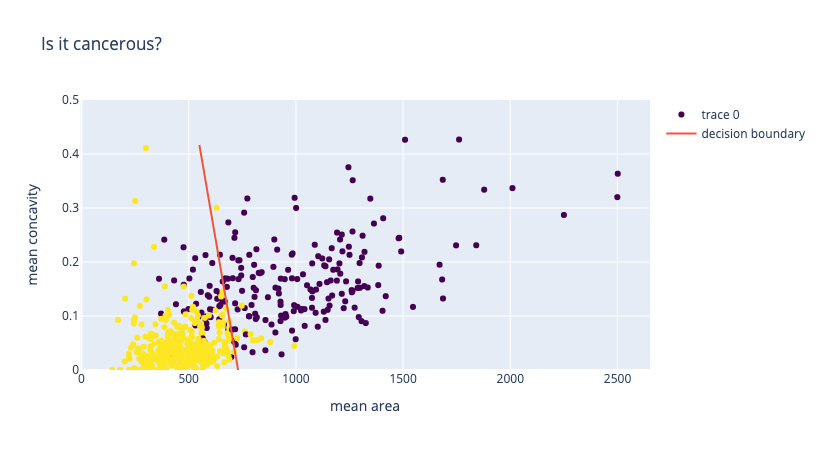

In [4]:
import pandas as pd
import plotly.graph_objects as go
cancer_json = "https://storage.googleapis.com/curriculum-assets/nn-from-scratch/cancer_logistic.json"
fig_dict = dict(pd.read_json(cancer_json, typ = 'dict'))
go.Figure(fig_dict)

We call that line our decision boundary, and it represents the boundary between our perceptron predicting one value or another.  From there, we saw that we can see the confidence in our prediction by looking at the output of our linear component.

In [1]:
def linear_component(x_1, x_2):
    return -0.00802333*x_1 +  -3.47361781*x_2 + 5.86

The closer the linear component's output is to zero, the closer the corresponding observation is to the decision boundary, and thus, the lesson confident the prediction.

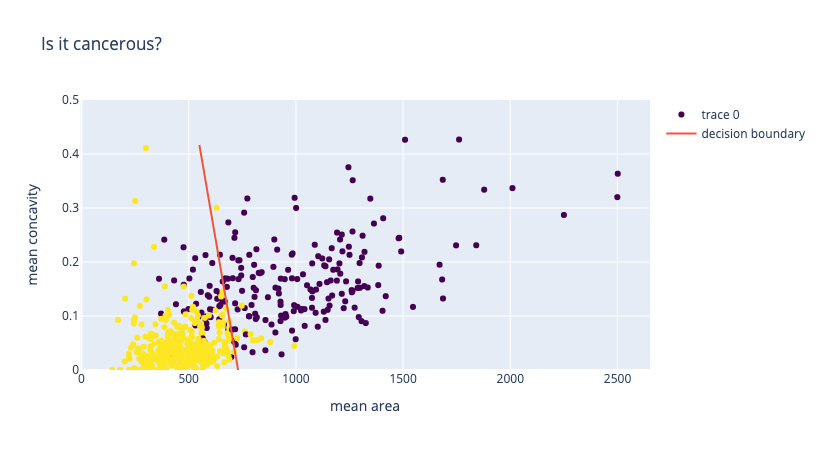

In [5]:
weighted_sums_json = "https://storage.googleapis.com/curriculum-assets/nn-from-scratch/weighted_sum_cancer.json"
weighted_dict = dict(pd.read_json(weighted_sums_json, typ = 'dict'))
go.Figure(weighted_dict)

## From confidence to probabilities

Our code is currently looking quite good, but there is one thing that we would like to change.  We are currently looking at two components for our predictions -- the activation function for the prediction of 1 or 0, and the linear function for our confidence in the prediction.

Let's change our activation function so that it expresses both the prediction and a degree of confidence in the prediction.  Our activation function will do so by returning a number **between** 1 and 0 based on it's confidence in the prediction. 

For example, if confident in a prediction of 1, the activation function would now return a number *close* to 1 (like .98).  And if confident in a prediction of 0, the neuron would return a number close to 0, like .02.

To accomplish this, we'll change our activation function to make use of the sigmoid function.  This is the sigmoid function.

$\sigma(x) = \frac{1}{1 + e^{-x}} $

The sigmoid function is generally represented by the Greek letter, $\sigma$, and as we'll see, it accomplishes what we want.  It brings large positive numbers close to 1, and large negative numbers close to 0.  Let's see about why.

### Introducing the sigmoid function

Here, again, is our sigmoid function.

$\sigma(z) = \frac{1}{1 + e^{-z}} $

> Let's think about what this function does.  

When $z$ is a large positive number, say $1,000$, we have:

* $\sigma(-1000) = \frac{1}{1 + e^{-1000}} = \frac{1}{1 + 1/e^{1000}}  = \frac{1}{1 + small\_num} \approx 1$

And when $z$ is a large negative number, we have: 

* $\sigma(1000) = \frac{1}{1 + e^{1000}} = \frac{1}{1 + e^{1000}}  = \frac{1}{1 + big\_num} \approx 0$

Finally, when $z = 0$ we have: 

* $\sigma(0) = \frac{1}{1 + e^{0}} = \frac{1}{1 + 1} = \frac{1}{2}$ 

We can also see this by translating the sigmoid function into code an plugging in a few values.

> Press shift + return.

In [1]:
import numpy as np
def sigmoid(value):
    return 1/(1 + np.exp(-value))

In [2]:
sigmoid(-7)
# 0.000911

sigmoid(7)
# 0.9990

sigmoid(0)
# 0.5

0.5

So our sigmoid function takes values between positive and negative infinity and maps those values to numbers between 0 and 1.  Ok, let's try using our sigmoid function as our new activation function.

This means that we will start with outputs from our linear component.

In [2]:
x_1 = 1001.0
x_2 = 0.3001
linear_component(x_1, x_2)

-3.2137860347809992

And feed this output into our sigmoid function.

In [5]:
sigmoid(linear_component(x_1, x_2))

0.03865021315826872

So as we see, we now get our neuron outputting a number of .03.  This indicates a degree of confidence in a prediction that cancer is not present.  

> So to recap, the closer to 1 or 0, the more confident we are in a prediction of 1 or 0.  And the closer our output is to .5, the less confident we are in a prediction of either 1 or 0.

### Plotting our New Neuron

Let's plot our graph of breast cancer data again, this time with our new activation function of our sigmoid function.

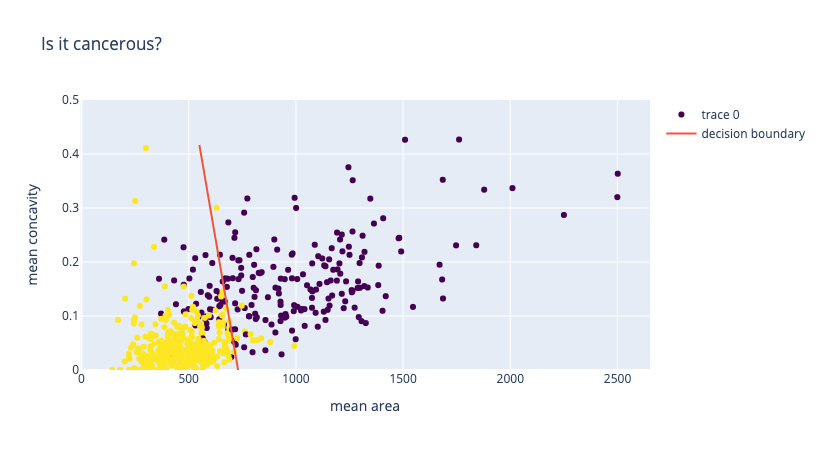

In [7]:
import pandas as pd
probs_json = "https://storage.googleapis.com/curriculum-assets/nn-from-scratch/cancerous_probs.json"
weighted_dict = dict(pd.read_json(probs_json, typ = 'dict'))
go.Figure(weighted_dict)

As we can see, the closer the points are to the decision boundary, the closer the score is to .5 -- representing a .5 probability of cancer being present.  The further the points are to the left to the bottom, the closer the scores are to 1.  The further points are to the right, the closer they are to 0.

### A couple of terms

Let's take a moment to describe what we have arrived at.  We have built a **sigmoid neuron**. 

> A sigmoid neuron consists of both a linear function and an activation function of the sigmoid function.

$z(x) = w_1x_1 + w_2x_2 + b $

Then we pass this output to our activation function -- of the sigmoid function.    

$\sigma(z) = \frac{1}{1 + e^{-z}} $

So to summarize, our sigmoid neuron is a linear function wrapped in a sigmoid function: 

In [6]:
x_1 = 1001.0
x_2 = 0.3001
sigmoid(linear_component(x_1, x_2))

0.03865021315826872

Or to write it mathematically: 

$\sigma(z(x)) =  \frac{1}{1 + e^{-z(x)}} $

where $z(x) = w_1x_1 + w_2x_2 ... w_nx_n + b $

This is the hypothesis function of our sigmoid neuron.

* Thinking in Layers

Finally, even though we are describing a single neuron, we can think of the linear function and activation function as two different layers of the network.  To reinforce this, we could express our hypothesis function with the following:

* $z(x) = w_1x_1 + w_2x_2 + b $
* $a(z) =  \frac{1}{1 + e^{-z(x)}} $

So we can think of information as flowing downwards through these two layers of the neural network.

### Summary

We have now made it to the final form of our neuron's hypothesis function.  Our artificial neuron takes in weighted inputs and now returns a value between 1 and 0.  A value of .5 means that the artificial neuron is not making a prediction one way or the other. 

We calculate the hypothesis function in two steps: 

1. A linear component, which we represent with `z` 
2. Passing the output of that linear component to our activation function

So for an sigmoid neuron that takes in two inputs, we calculate the output with the following:

$z = w_1x_1 + w_2x_2 + b$

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/jigsaw-labs.png" width="15%" style="text-align: center"></a>
</center>